<a href="https://colab.research.google.com/github/Wanzzrghh/GDGOC---PENUGASAN-5/blob/main/Wine_Dataset_for_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from scipy.cluster.hierarchy import dendrogram, linkage
from google.colab import files

In [2]:
uploaded = files.upload()


Saving wine-clustering.csv to wine-clustering.csv


In [3]:
wine_df = pd.read_csv(next(iter(uploaded)))

print("Data Sample:")
print(wine_df.head())
print("\nInfo Data:")
print(wine_df.info())

Data Sample:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  

In [4]:
wine_df.dropna(inplace=True)


In [6]:
numeric_cols = wine_df.select_dtypes(include=[np.number]).columns
wine_numeric = wine_df[numeric_cols]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(wine_numeric)

In [7]:
def visualisasi(title, x, y, hue, df, palette):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, hue=hue, data=df, palette=palette, s=100, edgecolor='k', alpha=0.8)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# ***Regression***

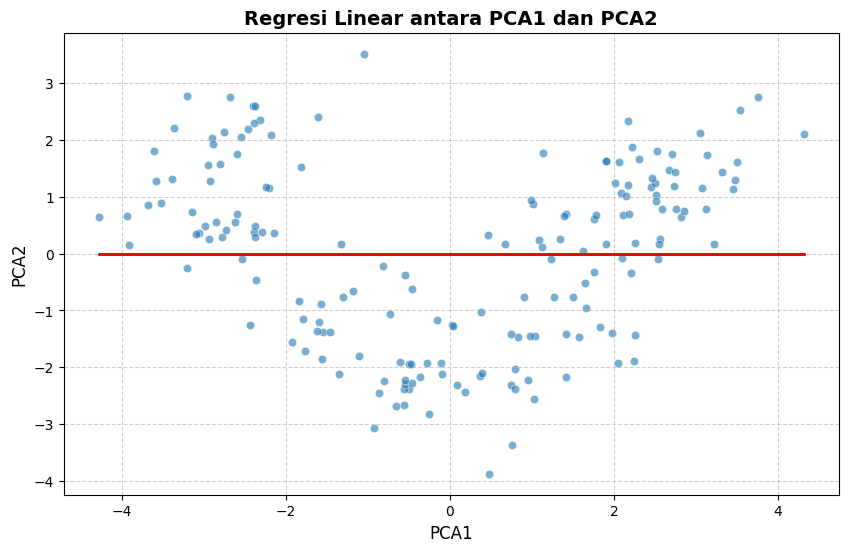

In [16]:
reg = LinearRegression()
X = wine_df[['PCA1']]
y = wine_df['PCA2']
reg.fit(X, y)
wine_df['Regression_Pred'] = reg.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=wine_df, alpha=0.6)
plt.plot(wine_df['PCA1'], wine_df['Regression_Pred'], color='red', linewidth=2)
plt.title('Regresi Linear antara PCA1 dan PCA2', fontsize=14, fontweight='bold')
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ***Metode PCA***

<ipython-input-7-c0d84444ee2c>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x, y=y, hue=hue, data=df, palette=palette, s=100, edgecolor='k', alpha=0.8)
<ipython-input-7-c0d84444ee2c>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')


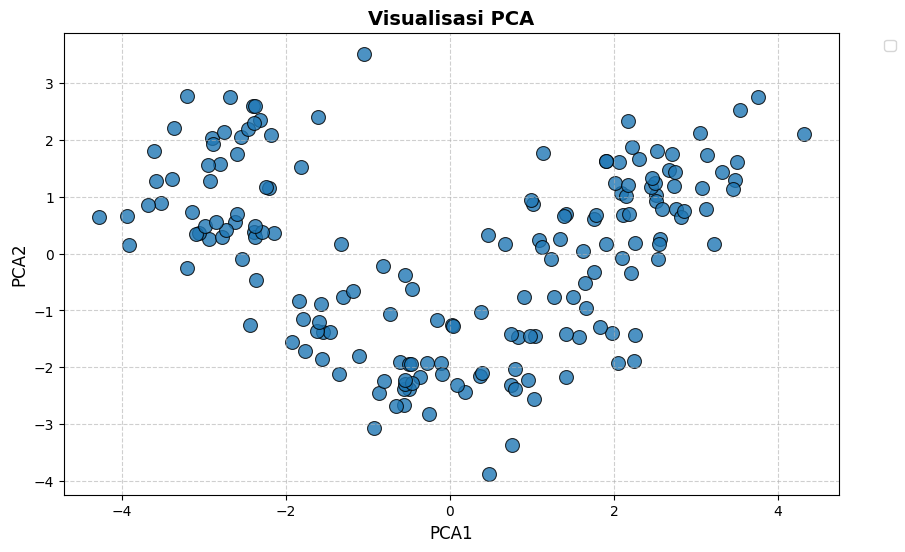

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
wine_df['PCA1'] = pca_result[:, 0]
wine_df['PCA2'] = pca_result[:, 1]
visualisasi('Visualisasi PCA', 'PCA1', 'PCA2', None, wine_df, 'coolwarm')

# ***Metode K - Means***

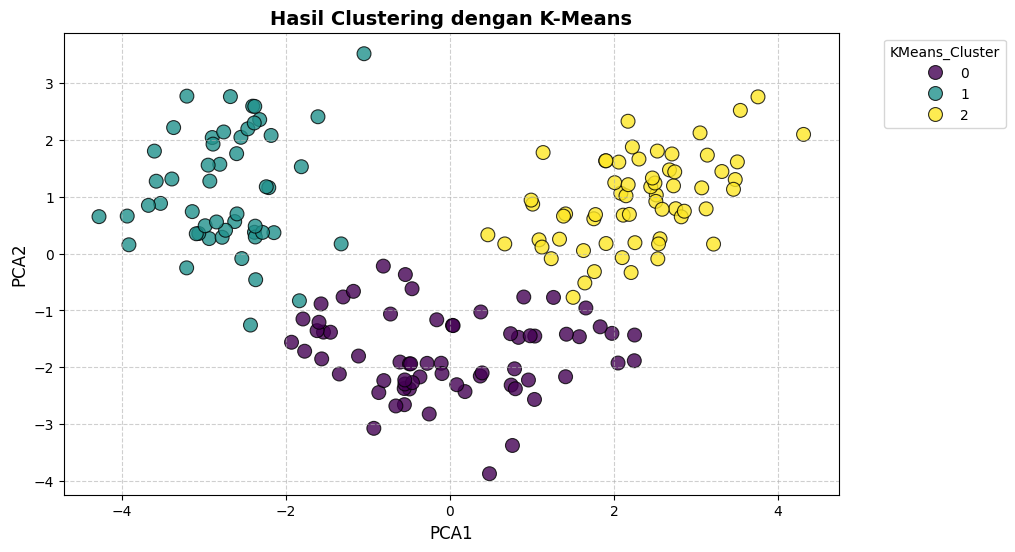

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
wine_df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)
visualisasi('Hasil Clustering dengan K-Means', 'PCA1', 'PCA2', 'KMeans_Cluster', wine_df, 'viridis')

# ***Metode Agglomerative Clustering***

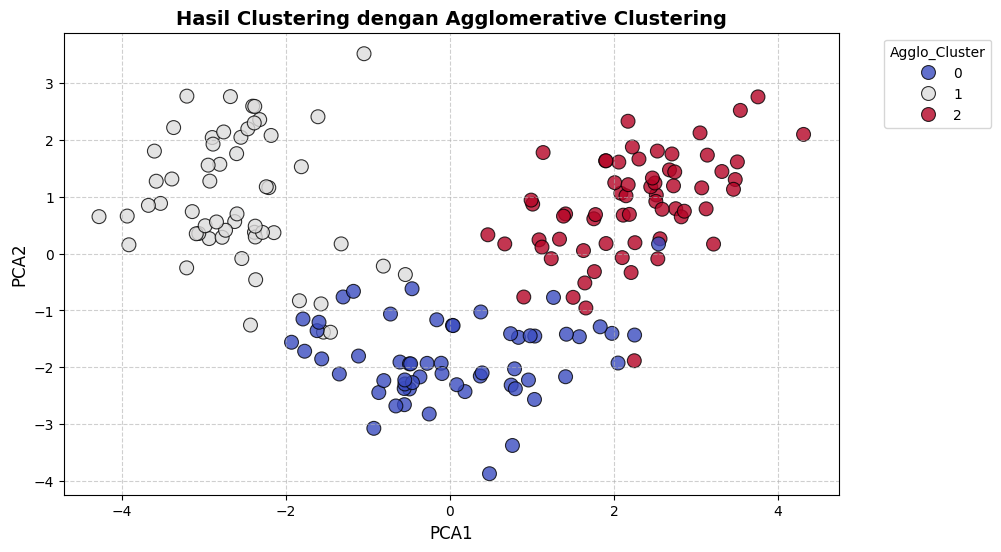

In [11]:
agglo = AgglomerativeClustering(n_clusters=3)
wine_df['Agglo_Cluster'] = agglo.fit_predict(data_scaled)
visualisasi('Hasil Clustering dengan Agglomerative Clustering', 'PCA1', 'PCA2', 'Agglo_Cluster', wine_df, 'coolwarm')


# ***Metode DBSCAN***

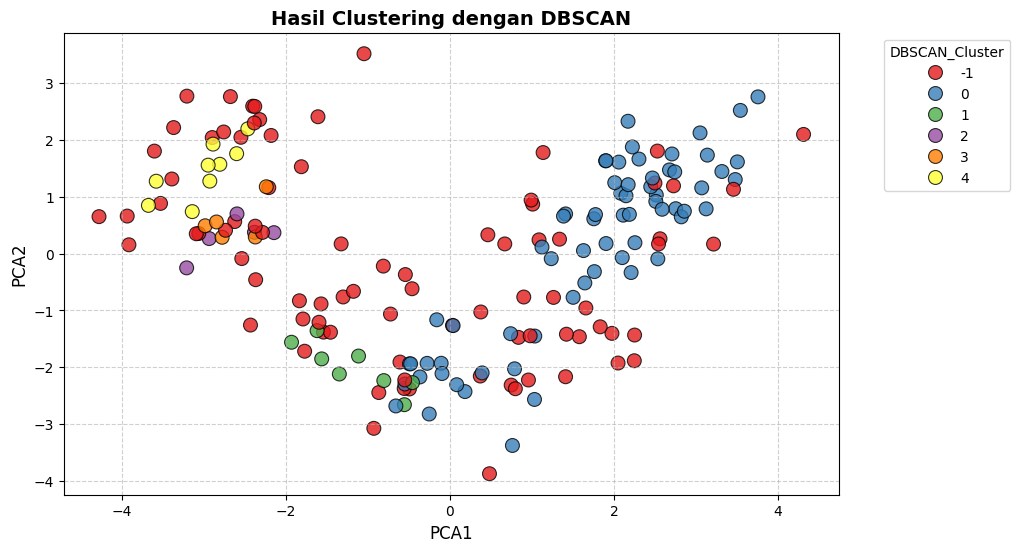

In [12]:
dbscan = DBSCAN(eps=2, min_samples=5)
wine_df['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)
visualisasi('Hasil Clustering dengan DBSCAN', 'PCA1', 'PCA2', 'DBSCAN_Cluster', wine_df, 'Set1')


# ***Metode t-SNE***

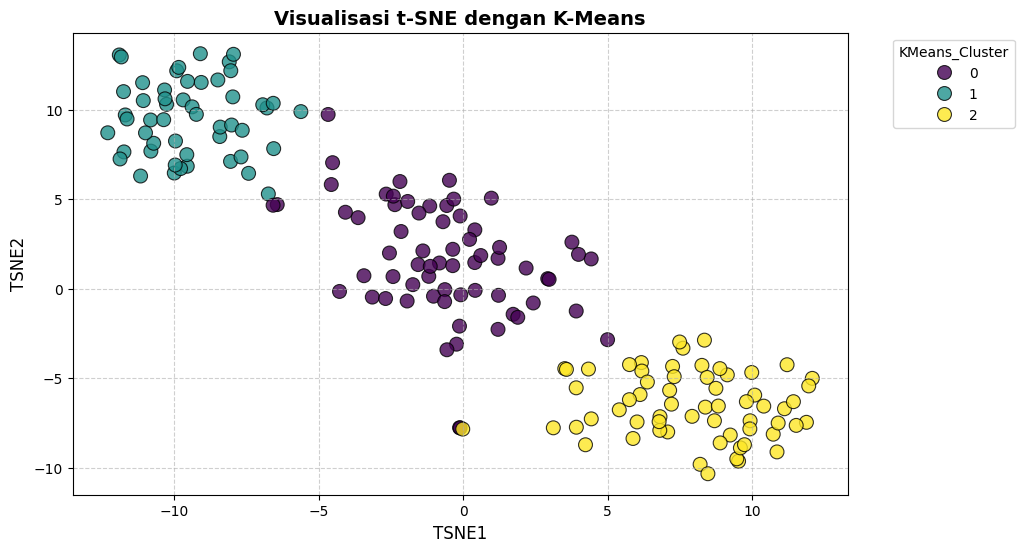

In [13]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(data_scaled)
wine_df['TSNE1'] = tsne_result[:, 0]
wine_df['TSNE2'] = tsne_result[:, 1]
visualisasi('Visualisasi t-SNE dengan K-Means', 'TSNE1', 'TSNE2', 'KMeans_Cluster', wine_df, 'viridis')


# ***Agglomerative Clustering Seluruh***

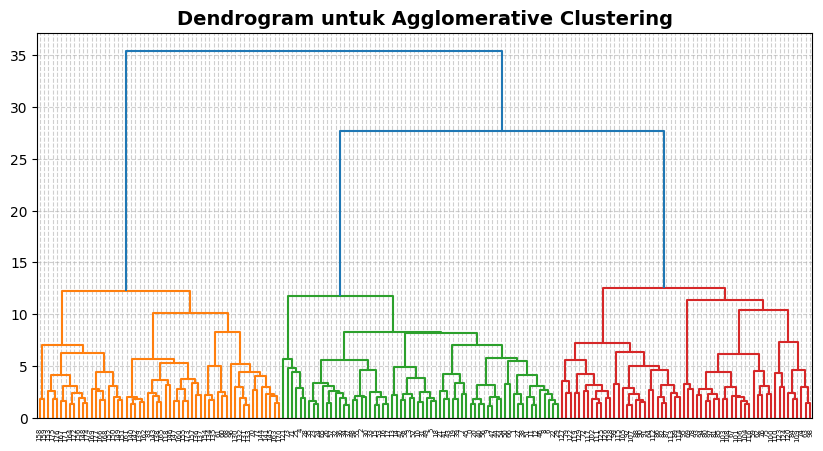

In [14]:
plt.figure(figsize=(10, 5))
Z = linkage(data_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram untuk Agglomerative Clustering', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ***Kesimpulan***

1. Regresi linear pada PCA1 dan PCA2 memberikan wawasan tambahan mengenai hubungan antar fitur setelah reduksi dimensi.
2. Tiga metode clustering utama (K-Means, Agglomerative, dan DBSCAN) menunjukkan pola pengelompokan yang berbeda, masing-masing dengan keunggulan tersendiri.
3. PCA dan t-SNE memberikan gambaran yang lebih jelas mengenai distribusi data, membantu dalam interpretasi hasil clustering.
4. DBSCAN berguna dalam mendeteksi outlier, yang mungkin mencerminkan data wine yang memiliki komposisi kimia yang berbeda dari kebanyakan sampel lainnya.
5. Dendrogram dari Agglomerative Clustering membantu dalam menentukan jumlah klaster yang optimal berdasarkan hubungan hierarkis antar data.